In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host="localhost",
                            username = "root",
                            password = "07062001",
                            database = "ecommerce")
cursor = db.cursor()

# List all unique cities where customers are located.

In [39]:
query = """select distinct upper(customer_city) from customers"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns= ["City"])
df = df.head(20)
df

,City
0,FRANCA
1,SAO BERNARDO DO CAMPO
2,SAO PAULO
3,MOGI DAS CRUZES
4,CAMPINAS
5,JARAGUA DO SUL
6,TIMOTEO
7,CURITIBA
8,BELO HORIZONTE
9,MONTES CLAROS


# Count the number of orders placed in 2017.

In [40]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""
cursor.execute(query)
data = cursor.fetchall()
"Total orders placed in 2017 are: ", data[0][0]

('Total orders placed in 2017 are: ', 45101)

# Find the total sales per category.

In [41]:
query = """select upper(products.product_category_name) Category, round(sum(payments.payment_value),2) Sales from 
products join orderitems on products.product_id = orderitems.product_id 
join payments on payments.order_id = orderitems.order_id group by product_category_name"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Product Category", "Total Sales"])
df

,Product Category,Total Sales
0,PERFUMARIA,506738.66
1,MOVEIS_DECORACAO,1430176.39
2,TELEFONIA,486882.05
3,FASHION_BOLSAS_E_ACESSORIOS,218158.28
4,CAMA_MESA_BANHO,1712553.67
...,...,...
69,CDS_DVDS_MUSICAIS,1199.43
70,LA_CUISINE,2913.53
71,FASHION_ROUPA_INFANTO_JUVENIL,785.67
72,PC_GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [42]:
query = """select (sum(case when payment_installments >= 1 then 1 
else 0 end)/count(*))*100 from payments"""
cursor.execute(query)
data = cursor.fetchall()
"the percentage of orders that were paid in installments: ", data[0][0]

('the percentage of orders that were paid in installments: ',
 Decimal('99.9981'))

# Count the number of customers from each state. 

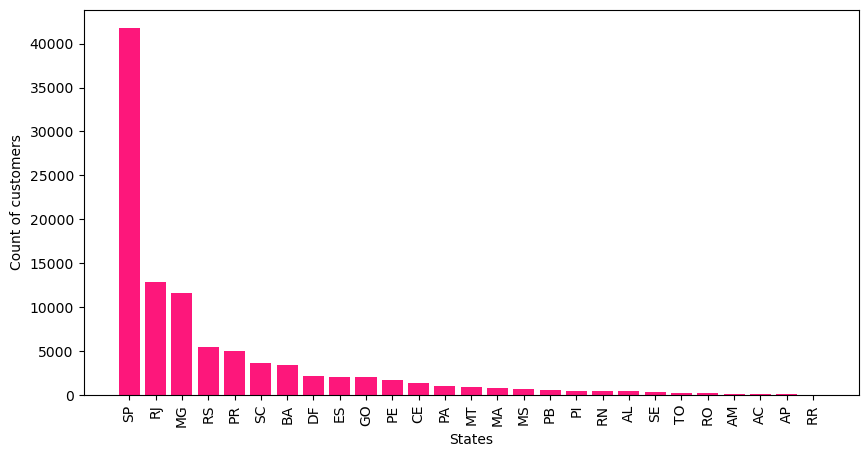

In [43]:
query = """select customer_state, count(customer_id) from customers group by customer_state"""
cursor.execute(query)
data = cursor.fetchall()
plt.figure(figsize=(10,5))
df = pd.DataFrame(data, columns = ["State", "Count of customers"])
df = df.sort_values(by = "Count of customers", ascending=False)
plt.bar(df["State"], df["Count of customers"], color = "#fd177b")
plt.xlabel("States")
plt.ylabel("Count of customers")
plt.xticks(rotation=90)
plt.show()

# Calculate the number of orders per month in 2018.

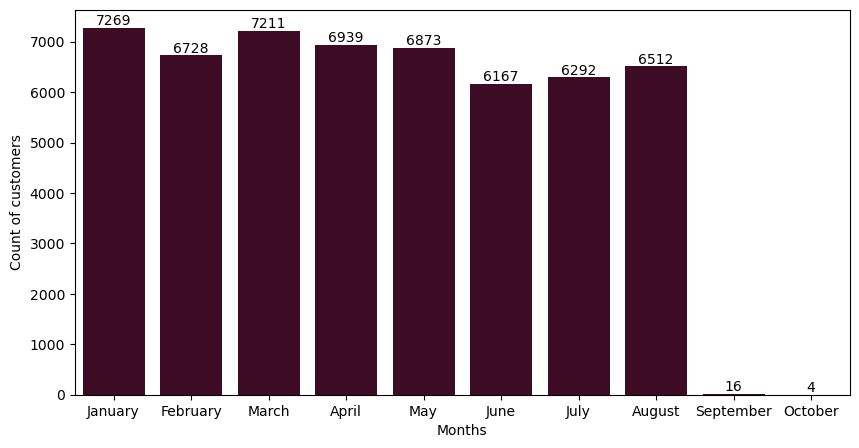

In [44]:
query = """select monthname(order_purchase_timestamp) months, count(order_id) order_count from orders
where year(order_purchase_timestamp) = 2018 group by months"""
cursor.execute(query)
data = cursor.fetchall()
#data
plt.figure(figsize=(10,5))
df = pd.DataFrame(data, columns = ["Months", "Count of customers"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
b = sns.barplot(x=df["Months"], y=df["Count of customers"], data=df, order = o, color = "#450324")
b.bar_label(b.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city.

In [45]:
query = """with count_per_order as(select orders.order_id, orders.customer_id, count(orderitems.order_id) as oc from orders join
 orderitems on orders.order_id = orderitems.order_id group by orders.order_id, orders.customer_id) 
 select customers.customer_city City, round(avg(count_per_order.oc),2) Average_Orders from customers join count_per_order on 
 customers.customer_id = count_per_order.customer_id group by customers.customer_city order by Average_orders desc;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns=["City", "Average Orders"])
df.head(20)

,City,Average Orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,cidelandia,4.00
7,picarra,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [46]:
query = """select upper(products.product_category_name) Category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2)
 sales_percentage from products join orderitems on products.product_id = orderitems.product_id 
join payments on payments.order_id = orderitems.order_id group by product_category_name order by sales_percentage desc;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns=["Category", "Revenue%"])
df.head(20)

,Category,Revenue%
0,CAMA_MESA_BANHO,10.70
1,BELEZA_SAUDE,10.35
2,INFORMATICA_ACESSORIOS,9.90
3,MOVEIS_DECORACAO,8.93
4,RELOGIOS_PRESENTES,8.93
5,ESPORTE_LAZER,8.70
6,UTILIDADES_DOMESTICAS,6.84
7,AUTOMOTIVO,5.32
8,FERRAMENTAS_JARDIM,5.24
9,COOL_STUFF,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [47]:
query = """select upper(products.product_category_name), count(orderitems.product_id), round(avg(orderitems.price),2) from 
orderitems join products on orderitems.product_id = products.product_id group by products.product_category_name;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns=["City", "Order Count", "Average Price"])
df
arr1 = df["Order Count"]
arr2 = df["Average Price"]
c = np.corrcoef([arr1,arr2])
print("The correlation between the product price and the number of times it has been purchased is: ",c[0][1])

The correlation between the product price and the number of times it has been purchased is:  -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

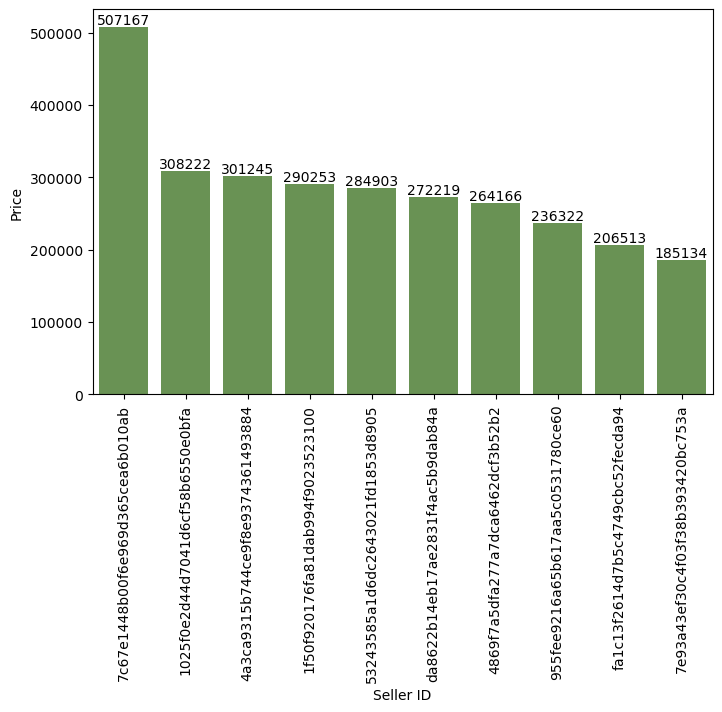

In [48]:
query = """select *, dense_rank() over(order by revenue desc) as rnk from
(select orderitems.seller_id, round(sum(payments.payment_value),2) Revenue
from orderitems join payments on orderitems.order_id = payments.order_id group by orderitems.seller_id) as a;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns=["Seller ID", "Price", "Rank"])
df = df.head(10)
plt.figure(figsize=[8,5])
ax = sns.barplot(x="Seller ID", y="Price", data=df, color = "#669c4a")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [49]:
query = """select customer_id, order_purchase_timestamp, payment, 
avg(payment) over(partition by customer_id order by order_purchase_timestamp rows 
between 2 preceding and current row) as moving_avg from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from orders join payments on
orders.order_id = payments.order_id) as a;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns= ["Customer ID", "Order_Purchase_Time", "Payment", "Moving Avg"])
df

,Customer ID,Order_Purchase_Time,Payment,Moving Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

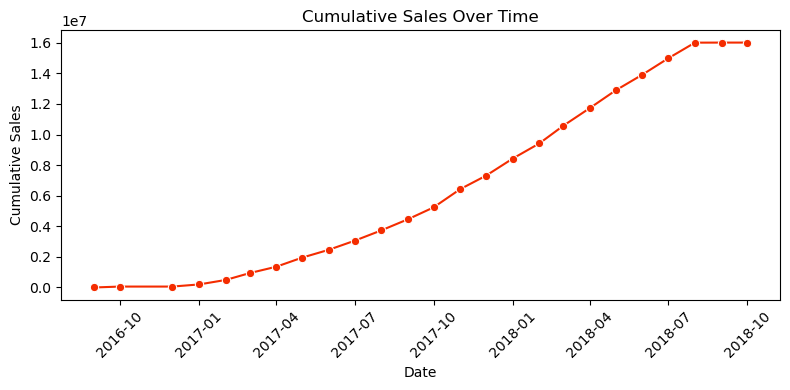

In [50]:
query = """select years, months, sum(payment) over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years, month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value),2) as payment from orders join payments on orders.order_id = payments.order_id 
group by years, months order by years, months) as a;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns= ["Year", "Months", "Cumulative Sales"])
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Months"].astype(str) + "-01")
df = df.sort_values("Date")
plt.figure(figsize=(8,4))
sns.lineplot(x="Date", y="Cumulative Sales", data=df, marker="o", color="#f42c00")
plt.title("Cumulative Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the year-over-year growth rate of total sales.

In [51]:
query = """with a as(select year(orders.order_purchase_timestamp) as years, 
round(sum(payments.payment_value),2) as payment from orders join payments on orders.order_id = payments.order_id 
group by years order by years)
select years, ((payment - lag(payment,1) over(order by years))/lag(payment,1) over(order by years)) *100 from a;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data, columns= ["Year", "Year-Over-Year Growth Rate"])
df

,Year,Year-Over-Year Growth Rate
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Identify the top 3 customers who spent the most money in each year.

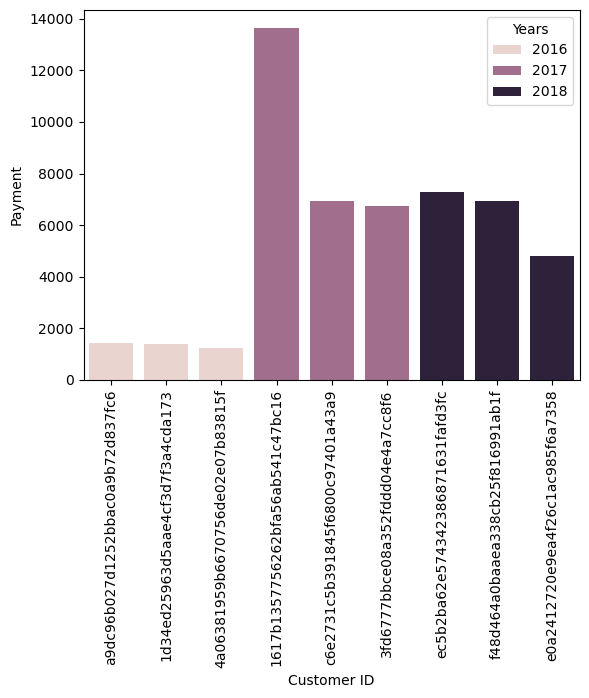

In [52]:
query = """select years, customer_id, payment, d_rank from (select year(orders.order_purchase_timestamp) years, 
orders.customer_id, sum(payments.payment_value) payment, dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank from orders join payments on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp), orders.customer_id) as a where d_rank <=3;"""
cursor.execute(query)
data = cursor.fetchall()
#data
df = pd.DataFrame(data,  columns= ["Years", "Customer ID", "Payment", "Rank"])
sns.barplot(x = "Customer ID", y = "Payment", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.show()